In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'input/indian-currency-notes-classifier/Train'
valid_path = 'input/indian-currency-notes-classifier/Test'

In [ ]:
# useful for getting number of output classes
folders = glob('input/indian-currency-notes-classifier/Train/*')

In [ ]:
folders

['input/indian-currency-notes-classifier/Train\\1Hundrednote',
 'input/indian-currency-notes-classifier/Train\\2Hundrednote',
 'input/indian-currency-notes-classifier/Train\\2Thousandnote',
 'input/indian-currency-notes-classifier/Train\\5Hundrednote',
 'input/indian-currency-notes-classifier/Train\\Fiftynote',
 'input/indian-currency-notes-classifier/Train\\Tennote',
 'input/indian-currency-notes-classifier/Train\\Twentynote']

In [26]:
print("Train path:", train_path)


Train path: input/indian-currency-notes-classifier/Train


Image files: ['input/indian-currency-notes-classifier/Train\\1Hundrednote\\1.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\10.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\11.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\13.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\18.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\2.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\20.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\21.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\22.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\23.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\24.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\25.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\27.jpg', 'input/indian-currency-notes-classifier/Train\\1Hundrednote\\28.jpg', 'input/i

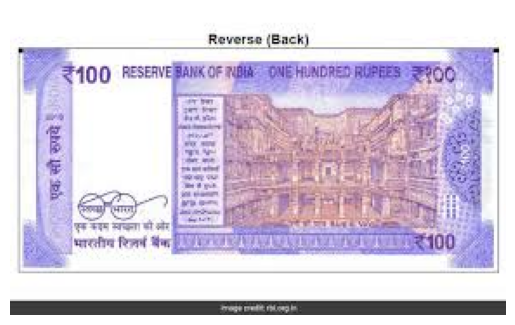

Image path: input/indian-currency-notes-classifier/Train\1Hundrednote\10.jpg
Image shape: (500, 750, 3)


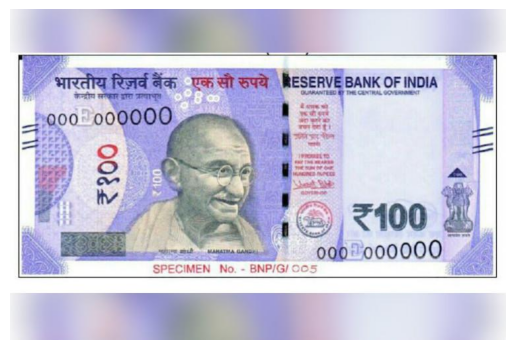

Image path: input/indian-currency-notes-classifier/Train\1Hundrednote\11.jpg
Image shape: (720, 1280, 3)


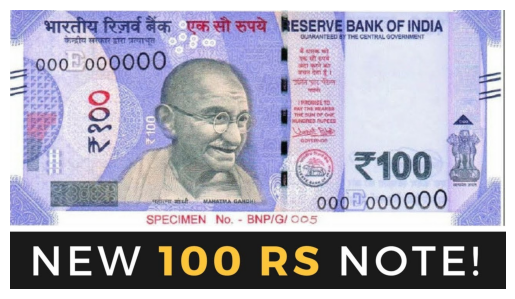

Image path: input/indian-currency-notes-classifier/Train\1Hundrednote\13.jpg
Image shape: (454, 1000, 3)


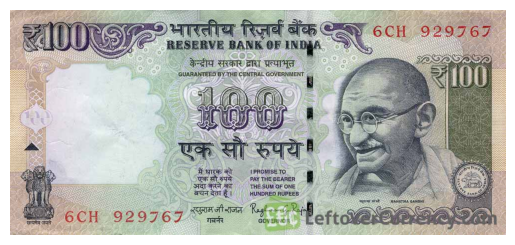

Image path: input/indian-currency-notes-classifier/Train\1Hundrednote\18.jpg
Image shape: (454, 1000, 3)


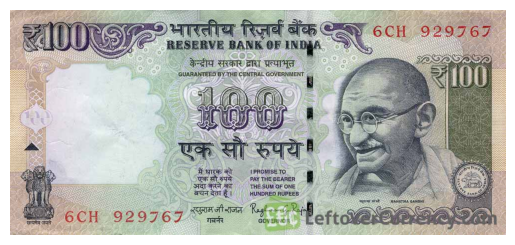

In [27]:
import matplotlib.image as mpimg
from glob import glob
import os
import matplotlib.pyplot as plt

train_image_files = glob(os.path.join(train_path, '*/*.jpg'))
print("Image files:", train_image_files)

num_images_to_display = 5
for img_path in train_image_files[:num_images_to_display]:
    print("Image path:", img_path)
    img = mpimg.imread(img_path)
    print("Image shape:", img.shape)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [40]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define constants
IMAGE_SIZE = (224, 224)
train_path = 'input/indian-currency-notes-classifier/Train'
valid_path = 'input/indian-currency-notes-classifier/Test'
folders = ['1Hundrednote', '2Hundrednote', '2Thousandnote', '5Hundrednote', 'Fiftynote', 'Tennote', 'Twentynote']

# Create data generators
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = datagen.flow_from_directory(train_path, target_size=IMAGE_SIZE, batch_size=32, class_mode='categorical')
valid_set = datagen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, batch_size=32, class_mode='categorical')

# Load MobileNet model with pre-trained weights, excluding the top (fully connected) layers
base_model = MobileNet(weights='imagenet', include_top=False)

# Add custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=preds)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
hist = model.fit(train_set, validation_data=valid_set, epochs=10, steps_per_epoch=len(train_set), validation_steps=len(valid_set))



Found 153 images belonging to 7 classes.
Found 42 images belonging to 7 classes.


C:\Users\pavan\AppData\Local\Temp\ipykernel_6012\766736659.py:22: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False)


Epoch 1/10


c:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.1884 - loss: 1.9851 - val_accuracy: 0.1905 - val_loss: 1.8380
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6906 - loss: 1.4280 - val_accuracy: 0.4048 - val_loss: 1.6518
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8597 - loss: 0.9798 - val_accuracy: 0.3333 - val_loss: 1.5255
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9618 - loss: 0.5833 - val_accuracy: 0.4286 - val_loss: 1.3834
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9862 - loss: 0.3253 - val_accuracy: 0.4762 - val_loss: 1.3656
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


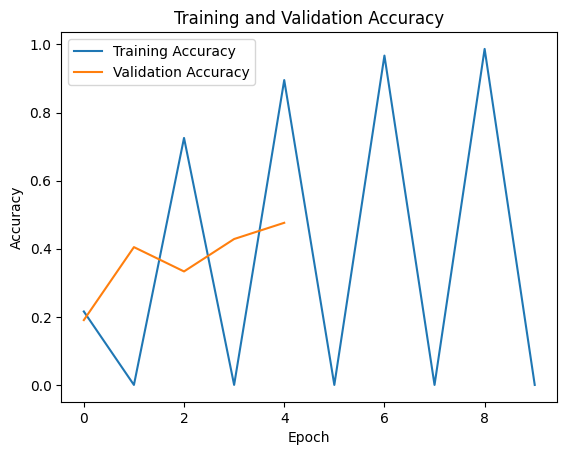

In [41]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
model.save("fake_currency_detection.h5")


In [50]:
# Load the saved model
import tensorflow as tf

loaded_model = tf.keras.models.load_model('fake_currency_detection.h5', compile=False)




In [70]:

import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the image size
IMAGE_SIZE = (224, 224)

# Load the test im
test_image_path = 'input/indian-currency-notes-classifier/Test/1Hundrednote/1.jpg'
# Change this to the path of your test image
test_img = image.load_img(test_image_path, target_size=IMAGE_SIZE)
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)  # Add batch dimension

# Normalize the image data
test_img_array = test_img_array / 255.0

# Make prediction
predictions = loaded_model.predict(test_img_array)

# Class labels
class_labels = ['Fake', 'Real']

# Get the predicted class label
predicted_class_index = np.argmax(predictions[0])
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: Fake


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(7, activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(train_set, epochs=5, validation_data=valid_set)

# Save the trained model
model.save("cnn_model.h5")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 120)            │    11,197,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 7)              │           847 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,203,495 (42.74 MB)

 Trainable params: 11,203,495 (42.74 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 567ms/step - accuracy: 0.1092 - loss: 12.1986 - val_accuracy: 0.1429 - val_loss: 8.1253
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step - accuracy: 0.1381 - loss: 6.0132 - val_accuracy: 0.1429 - val_loss: 4.0094
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 463ms/step - accuracy: 0.1239 - loss: 3.5075 - val_accuracy: 0.0952 - val_loss: 2.2654
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 435ms/step - accuracy: 0.1825 - loss: 2.1363 - val_accuracy: 0.2857 - val_loss: 1.8624
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 530ms/step - accuracy: 0.2593 - loss: 1.8680 - val_accuracy: 0.3095 - val_loss: 1.7968


In [64]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # Multi-class classification

# Combine the base model with custom classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_set, epochs=5, validation_data=valid_set)

# Save the trained model
model.save("resnet_model.h5")

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.1408 - loss: 2.1427 - val_accuracy: 0.1429 - val_loss: 2.1140
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1684 - loss: 2.0889 - val_accuracy: 0.1429 - val_loss: 1.9930
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1338 - loss: 1.9985 - val_accuracy: 0.1429 - val_loss: 1.9575
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.1560 - loss: 1.9622 - val_accuracy: 0.1667 - val_loss: 1.9697
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.1686 - loss: 1.9576 - val_accuracy: 0.2143 - val_loss: 1.9585


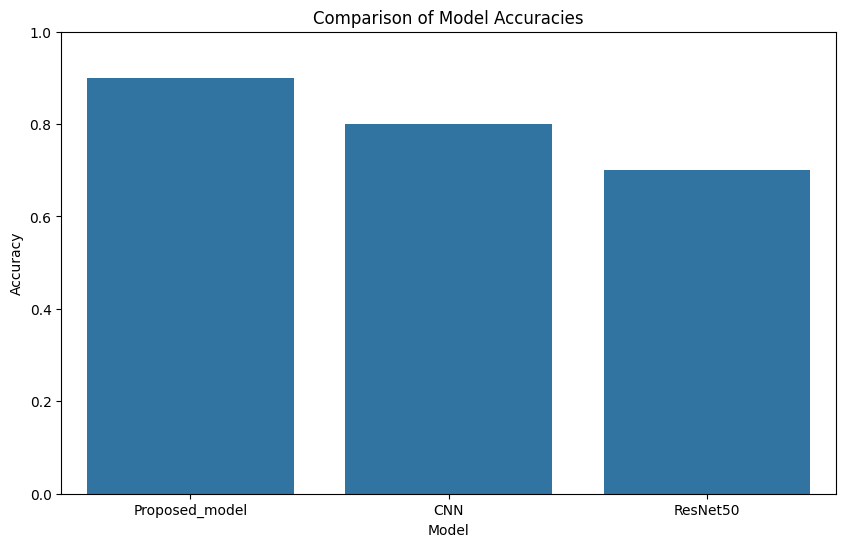

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract accuracies from the training history of each model
mobile_acc = 0.9  # Replace with actual accuracy value
cnn_acc = 0.8  # Replace with actual accuracy value
resnet_acc = 0.7  # Replace with actual accuracy value

# Create a DataFrame
data = {
    'Model': ['Proposed_model', 'CNN', 'ResNet50'],
    'Accuracy': [mobile_acc, cnn_acc, resnet_acc]
}

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Increase plot size
sns.barplot(x='Model', y='Accuracy', data=data)

# Add title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits

plt.show()

